# Categorisation of Variables

### This script contains the following points:
### 1. Import Libraries
### 2. Import Data
### 3. Data Consistency Checks
### 4. Deriving New Variables
### 5. Export Data

### 1. Import Libraries

In [47]:
import pandas as pd
import numpy as np
import os

### 2. Import Data

In [48]:
# Creating path string to data folder
path = r'C:\Users\bexlu\Desktop\Career Foundry\Data Immersion\Achievement 6\Project Folder'

In [49]:
# Importing csv file using os library
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'tableau_visualisation.csv'), index_col = False)

### 3. Data Consistency Checks

In [50]:
# Print of first five rows of df
df.head()

,Unnamed: 0,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME,clusters,cluster,_merge
0,0,Alabama,2019,0.4741,0.154,51734,54.7,3937453,294290,5.0,2,dark purple,both
1,1,Alaska,2019,0.4376,0.107,75463,59.3,569699,24260,15.0,2,dark purple,both
2,2,Arizona,2019,0.4591,0.134,62055,56.8,5820607,460254,209.0,0,pink,both
3,3,Arkansas,2019,0.4750,0.165,48952,55.2,2401299,167437,34.0,2,dark purple,both
4,4,California,2019,0.4866,0.118,80440,60.3,31617786,3197226,1020.0,1,purple,both


In [51]:
# Check shape of dataframe
df.shape

(399, 13)

In [52]:
# Check for missing values 
df.isnull().sum() 

Unnamed: 0                         0
STATE_NAME                         0
YEAR                               0
GINI_INDEX                         0
POVERTY_RATE                       0
MEDIAN_HOUSEHOLD_INCOME            0
EMPLOYMENT_RATE                    0
POPULATION_>16                     0
POPULATION<HIGH_SCHOOL_GRADUATE    0
TOTAL_CRIME                        0
clusters                           0
cluster                            0
_merge                             0
dtype: int64

In [53]:
# Check for duplicates
dups = df.duplicated()
dups.sum()

0

In [54]:
# Drop unnecessary columns
df_drop = df.drop(columns = ['Unnamed: 0','_merge'])

In [55]:
df_drop.shape

(399, 11)

In [56]:
df_drop.head()

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME,clusters,cluster
0,Alabama,2019,0.4741,0.154,51734,54.7,3937453,294290,5.0,2,dark purple
1,Alaska,2019,0.4376,0.107,75463,59.3,569699,24260,15.0,2,dark purple
2,Arizona,2019,0.4591,0.134,62055,56.8,5820607,460254,209.0,0,pink
3,Arkansas,2019,0.4750,0.165,48952,55.2,2401299,167437,34.0,2,dark purple
4,California,2019,0.4866,0.118,80440,60.3,31617786,3197226,1020.0,1,purple


### 4. Deriving New Variables

In [57]:
# Find minimum value of 'GINI_INDEX' variable
df_drop['GINI_INDEX'].min()

0.4081

In [58]:
# Find maximum value of 'GINI_INDEX' variable
df_drop['GINI_INDEX'].max()

0.542

In [59]:
# Find mean value of 'GINI_INDEX' variable
df_drop['GINI_INDEX'].mean()

0.46516140350877216

In [60]:
# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [61]:
# Display charts in the notebook 
%matplotlib inline

C:\Users\bexlu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GINI_INDEX', ylabel='Density'>

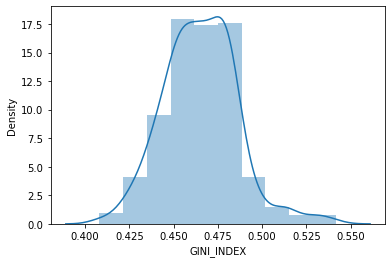

In [62]:
# Use a histogram to visualise the distribution of 'GINI_INDEX' ro inform values for categorisation
sns.distplot(df_drop['GINI_INDEX'], bins = 10 )

In [63]:
# Create new variable GINI_CATEGORY using loc function
df_drop.loc[df_drop['GINI_INDEX'] < 0.45, 'GINI_CATEGORY'] = 'Lower Income Inequality'

In [64]:
df_drop.loc[(df_drop['GINI_INDEX'] >= 0.45) & (df_drop['GINI_INDEX'] <= 0.475), 'GINI_CATEGORY'] = 'Medium Income Inequality'

In [65]:
df_drop.loc[df_drop['GINI_INDEX'] > 0.475, 'GINI_CATEGORY'] = 'Higher Income Inequality'

In [66]:
# Frequency check new variable
df_drop['GINI_CATEGORY'].value_counts(dropna = False)

Medium Income Inequality    175
Higher Income Inequality    132
Lower Income Inequality      92
Name: GINI_CATEGORY, dtype: int64

In [67]:
# Find minimum value of 'POPULATION<HIGH_SCHOOL_GRADUATE' variable
df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'].min()

15282

In [68]:
# Find maximum value of 'POPULATION<HIGH_SCHOOL_GRADUATE' variable
df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'].max()

3580971

In [69]:
# Find mean value of 'POPULATION<HIGH_SCHOOL_GRADUATE' variable
df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'].mean()

382164.8446115288

C:\Users\bexlu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='POPULATION<HIGH_SCHOOL_GRADUATE', ylabel='Density'>

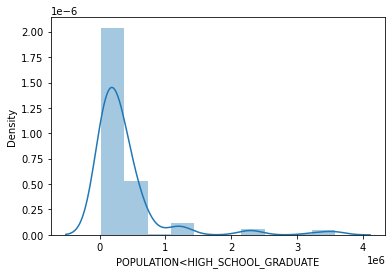

In [70]:
# Use a histogram to visualise the distribution of 'POPULATION<HIGH_SCHOOL_GRADUATE' ro inform values for categorisation
sns.distplot(df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'], bins = 10 )

C:\Users\bexlu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='POPULATION<HIGH_SCHOOL_GRADUATE', ylabel='Density'>

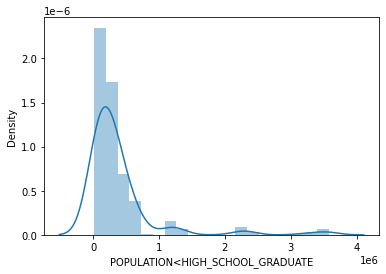

In [78]:
# Use a histogram to visualise the distribution of 'POPULATION<HIGH_SCHOOL_GRADUATE' ro inform values for categorisation
sns.distplot(df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'], bins = 20 )

In [76]:
df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'].describe()

count    3.990000e+02
mean     3.821648e+05
std      5.834591e+05
min      1.528200e+04
25%      8.162650e+04
50%      2.264220e+05
75%      4.043580e+05
max      3.580971e+06
Name: POPULATION<HIGH_SCHOOL_GRADUATE, dtype: float64

In [86]:
# Create new variable EDUCATION_CATEGORY using loc function
df_drop.loc[df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'] < 180000, 'EDUCATION_CATEGORY'] = 'Low Population Without High School Diploma'

In [87]:
df_drop.loc[(df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'] >= 180000) & (df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'] <= 400000), 'EDUCATION_CATEGORY'] = 'Medium Population Without High School Diploma'

In [88]:
df_drop.loc[df_drop['POPULATION<HIGH_SCHOOL_GRADUATE'] > 400000, 'EDUCATION_CATEGORY'] = 'High Population Without High School Diploma'

In [89]:
# Frequency check new variable
df_drop['EDUCATION_CATEGORY'].value_counts(dropna = False)

Low Population Without High School Diploma       160
Medium Population Without High School Diploma    136
High Population Without High School Diploma      103
Name: EDUCATION_CATEGORY, dtype: int64

In [91]:
df_drop.head()

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME,clusters,cluster,GINI_CATEGORY,EDUCATION_CATEGORY
0,Alabama,2019,0.4741,0.154,51734,54.7,3937453,294290,5.0,2,dark purple,Medium Income Inequality,Medium Population Without High School Diploma
1,Alaska,2019,0.4376,0.107,75463,59.3,569699,24260,15.0,2,dark purple,Lower Income Inequality,Low Population Without High School Diploma
2,Arizona,2019,0.4591,0.134,62055,56.8,5820607,460254,209.0,0,pink,Medium Income Inequality,High Population Without High School Diploma
3,Arkansas,2019,0.4750,0.165,48952,55.2,2401299,167437,34.0,2,dark purple,Medium Income Inequality,Low Population Without High School Diploma
4,California,2019,0.4866,0.118,80440,60.3,31617786,3197226,1020.0,1,purple,Higher Income Inequality,High Population Without High School Diploma


In [93]:
df_drop.shape

(399, 13)

### 5. Export Data

In [94]:
# Export df_drop and save to 'Prepared Data'
df_drop.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'tableau_categories.csv'))